In [65]:
import networkx as nx
import math

In [66]:
import pickle
with open('graph_objects/scigrid.pkl', 'rb') as f:
    G = pickle.load(f)
    G.name = 'SciGrid'

In [67]:
G = nx.Graph(G)

In [68]:
n  = G.number_of_nodes()
e = G.number_of_edges()
m  = int(e / n)
print("Nodes: ", n)
print("Edges: ", e)
print("Edges per node: ", m)

Nodes:  714
Edges:  805
Edges per node:  1


In [69]:
def visualize(g):
    nx.draw(g, with_labels=False, node_size=10, node_color='r', edge_color='b')

BA Model Nodes:  714
BA Model Edges:  713
BA Model Edges per node:  1


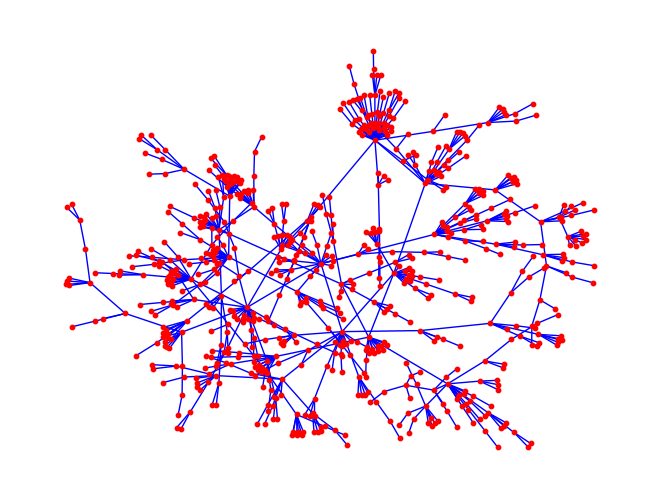

In [70]:
ba_model = nx.barabasi_albert_graph(n, m)
ba_model.name = 'BA Model'
print("BA Model Nodes: ", ba_model.number_of_nodes())
print("BA Model Edges: ", ba_model.number_of_edges())
print("BA Model Edges per node: ", m)
visualize(ba_model)

In [71]:
# Other models

# Random
rand_model = nx.erdos_renyi_graph(n, 0.0032)
rand_model.name = 'ER Model'
print("Random Model Nodes: ", rand_model.number_of_nodes())
print("Random Model Edges: ", rand_model.number_of_edges())

# Small world
sw_model = nx.watts_strogatz_graph(n, 2, 0.1)
sw_model.name = 'WS Model'
print("Small World Model Nodes: ", sw_model.number_of_nodes())
print("Small World Model Edges: ", sw_model.number_of_edges())

# Scale free extended
bae_model = nx.extended_barabasi_albert_graph(n, m, 0.0032, 0.5)
bae_model.name = 'BA Extended Model'
print("Scale Free Extended Model Nodes: ", bae_model.number_of_nodes())
print("Scale Free Extended Model Edges: ", bae_model.number_of_edges())

Random Model Nodes:  714
Random Model Edges:  870
Small World Model Nodes:  714
Small World Model Edges:  714
Scale Free Extended Model Nodes:  714
Scale Free Extended Model Edges:  715


C:\Users\Oskar\AppData\Local\Temp\ipykernel_11272\2837790850.py:16: RuntimeWarning: divide by zero encountered in log10
  x_range = np.logspace(np.log10(min(degree_values)), np.log10(max(degree_values)), 100)


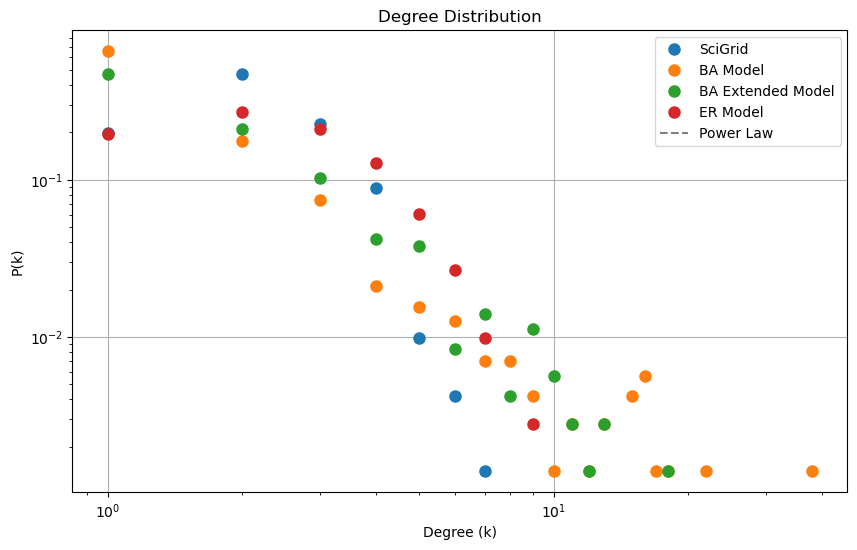

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def plot_degree_distribution(graphs):
    plt.figure(figsize=(10, 6))

    for i, graph in enumerate(graphs):
        degrees = dict(graph.degree())
        degree_values = sorted(set(degrees.values()))
        histogram = [list(degrees.values()).count(k) / float(nx.number_of_nodes(graph)) for k in degree_values]

        plt.loglog(degree_values, histogram, 'o', markersize=8, label=graph.name)

    # Plot a dotted line indicating a power law
    x_range = np.logspace(np.log10(min(degree_values)), np.log10(max(degree_values)), 100)
    y_range = [x**-2.5 for x in x_range]  # You can adjust the power law exponent as needed
    plt.plot(x_range, y_range, '--', color='gray', label='Power Law')

    plt.title("Degree Distribution")
    plt.xlabel("Degree (k)")
    plt.ylabel("P(k)")
    plt.legend()
    plt.grid(True)
    plt.show()

    
models = [G, ba_model, bae_model, rand_model]

plot_degree_distribution(models)
